# 使用pandas 和seaborn绘图

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 线型图
* Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们所生成的是线型图

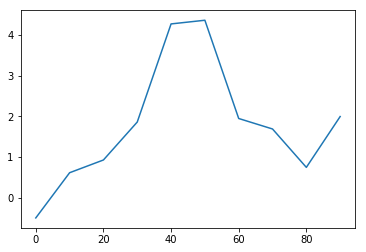

In [11]:
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot()

In [13]:
s

0    -0.502125
10    0.611011
20    0.924997
30    1.859573
40    4.276406
50    4.366946
60    1.946726
70    1.688532
80    0.742966
90    1.994725
dtype: float64

* 该Series对象的索引会被传给matplotlib，并用以绘制X轴。可以通过use_index=False禁用该功能。X轴的刻度和界限可以通过xticks和xlim选项进行调节，Y轴就用yticks和ylim。
* 参数列表如下：![](https://upload-images.jianshu.io/upload_images/7178691-6d9fbf863c09370a.png)
![](https://upload-images.jianshu.io/upload_images/7178691-44e50562aeb5eb49.png)

* DataFrame的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例

In [16]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns=['A',"B",'C','D'],
                 index = np.arange(0,100,10))
df

,A,B,C,D
0,0.375814,-0.107905,0.285597,-0.127976
10,0.107596,-0.805818,-0.507620,-1.007167
20,-0.594898,-1.781004,-1.514495,-2.744035
30,-0.793316,-3.497805,-0.961141,-2.771882
40,-0.647471,-4.691119,0.344920,-1.757087
50,1.031137,-5.651419,0.801765,-2.166651
60,0.899216,-6.205708,1.471705,-0.539999
70,2.121010,-5.440531,1.715724,-1.720697
80,2.958382,-3.958750,0.481963,-1.820990
90,3.670376,-4.223897,-0.177123,-1.446318


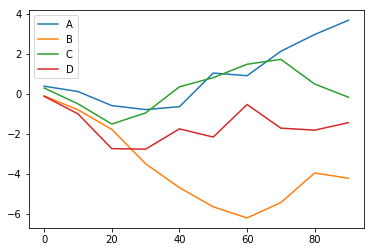

In [17]:
df.plot()

* DataFrame还有一些用于对列进行灵活处理的选项，例如，是要将所有列都绘制到一个subplot中还是创建各自的subplot
* 参数表![](https://upload-images.jianshu.io/upload_images/7178691-96651ecaa90f1c68.png)

## 柱状图
* plot.bar()和plot.barh()分别绘制水平和垂直的柱状图。这时，Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度

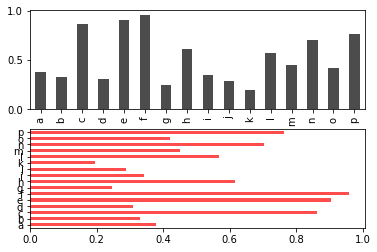

In [30]:
fig,axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16),index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0],color='k',alpha=0.7)
data.plot.barh(ax=axes[1],color='r',alpha=0.7)

In [32]:
# 有正数有负数
np.random.randn(10)

array([-1.07023238, -2.60305521, -0.34270297, -2.20261898,  0.0295722 ,
       -0.25381402,  0.10370884,  0.22665981, -0.00807395, -0.1277233 ])

In [34]:
# 只有正数
np.random.rand(10)

array([0.18845475, 0.26808236, 0.4911909 , 0.30446556, 0.27224037,
       0.6644953 , 0.780168  , 0.67096553, 0.93430181, 0.35273774])

* 对于DataFrame，柱状图会将每一行的值分为一组，并排显示

In [39]:
df = pd.DataFrame(np.random.rand(6,4),
                 index = ['one','two','three','four','five','six'],
                 columns = pd.Index(['A','B','C','D'],name='Genus'))
df

Genus,A,B,C,D
one,0.328068,0.676336,0.861867,0.756256
two,0.415073,0.280804,0.136388,0.426357
three,0.276342,0.926264,0.470209,0.517113
four,0.647134,0.584731,0.957254,0.740221
five,0.285188,0.668281,0.063578,0.354868
six,0.619828,0.253086,0.883706,0.069014


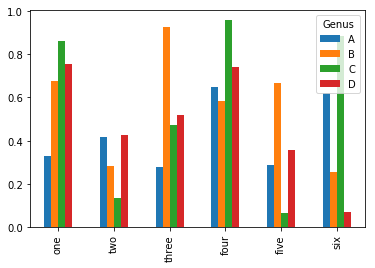

In [42]:
df.plot.bar()

* 设置stacked=True即可为DataFrame生成堆积柱状图，这样每行的值就会被堆积在一起

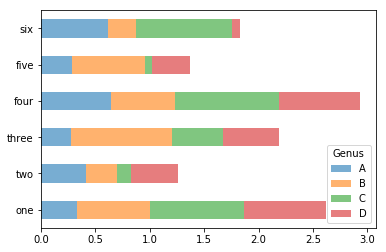

In [44]:
df.plot.barh(stacked=True, alpha=0.6)

* 假设我们想要做一张堆积柱状图以展示每天各种聚会规模的数据点的百分比。我用read_csv将数据加载进来，然后根据日期和聚会规模创建一张交叉表：

In [47]:
tips = pd.read_csv('data/examples/tips.csv')
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [49]:
tips[:10]

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


In [50]:
party_counts = party_counts.loc[:,2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


* 然后进行规格化，使得各行的和为1，并生成图表

In [51]:
party_pcts = party_counts.div(party_counts.sum(1),axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


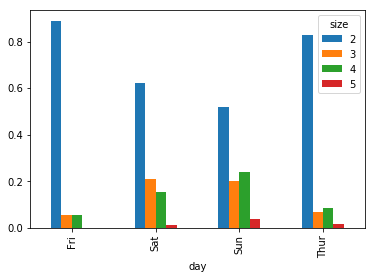

In [52]:
party_pcts.plot.bar()

In [59]:
party_counts.sum(1)#参数1是指对每一行求和

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

* 对于在绘制一个图形之前，需要进行合计的数据，使用seaborn可以减少工作量。用seaborn来看每天的小费比例

In [60]:
import seaborn as sns

In [62]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


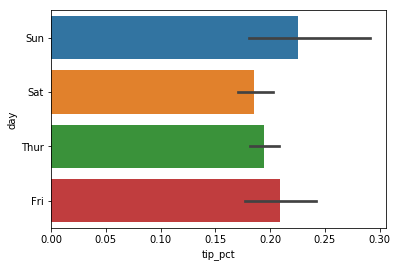

In [63]:
sns.barplot(x='tip_pct', y='day',data=tips, orient='h')

* seaborn的绘制函数使用data参数，它可能是pandas的DataFrame。其它的参数是关于列的名字。因为一天的每个值有多次观察，柱状图的值是tip_pct的平均值。绘制在柱状图上的黑线代表95%置信区间（可以通过可选参数配置）。

* seaborn.barplot有颜色选项，使我们能够通过一个额外的值设置

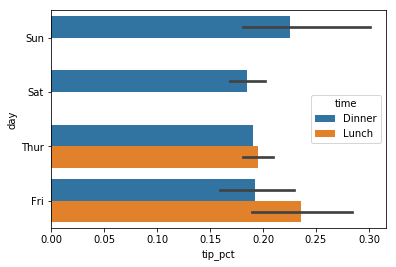

In [64]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

* 注意，seaborn已经自动修改了图形的美观度：默认调色板，图形背景和网格线的颜色。你可以用seaborn.set在不同的图形外观之间切换：

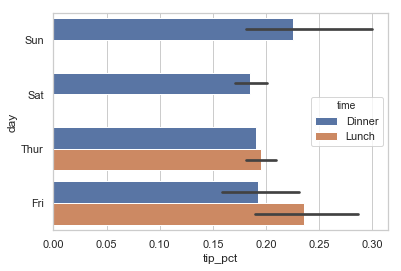

In [66]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
sns.set(style="whitegrid")

## 直方图和密度图
* 直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。再以前面那个小费数据为例：

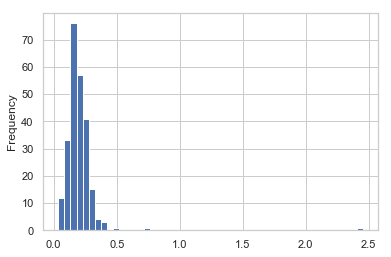

In [69]:
tips['tip_pct'].plot.hist(bins=50)

* 与此相关的一种图表类型是密度图，它是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核（即诸如正态分布之类的较为简单的分布）。因此，密度图也被称作KDE（Kernel Density Estimate，核密度估计）图。使用plot.kde和标准混合正态分布估计即可生成一张密度图

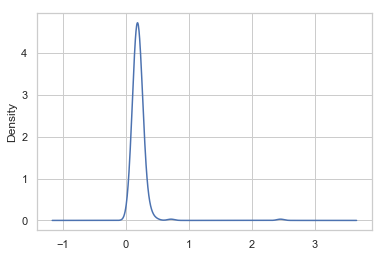

In [71]:
tips['tip_pct'].plot.density()

* seaborn的distplot方法绘制直方图和密度图更加简单，还可以同时画出直方图和连续密度估计图。作为例子，考虑一个双峰分布，由两个不同的标准正态分布组成

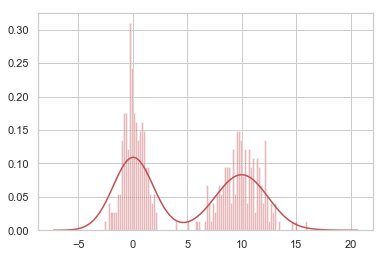

In [74]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(values, bins=100, color='r')

## 散点图

In [76]:
macro = pd.read_csv('data/examples/macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


* 然后可以使用seaborn的regplot方法，它可以做一个散布图，并加上一条线性回归的线

Text(0.5,1,'Changes in log m1 versus log unemp')

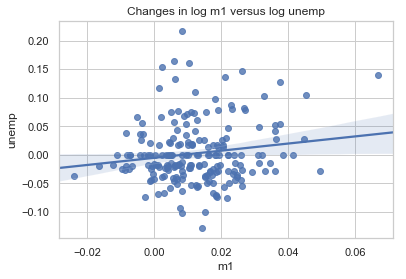

In [78]:
sns.regplot('m1','unemp',data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

* 在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被称为散布图矩阵（scatter plot matrix）。

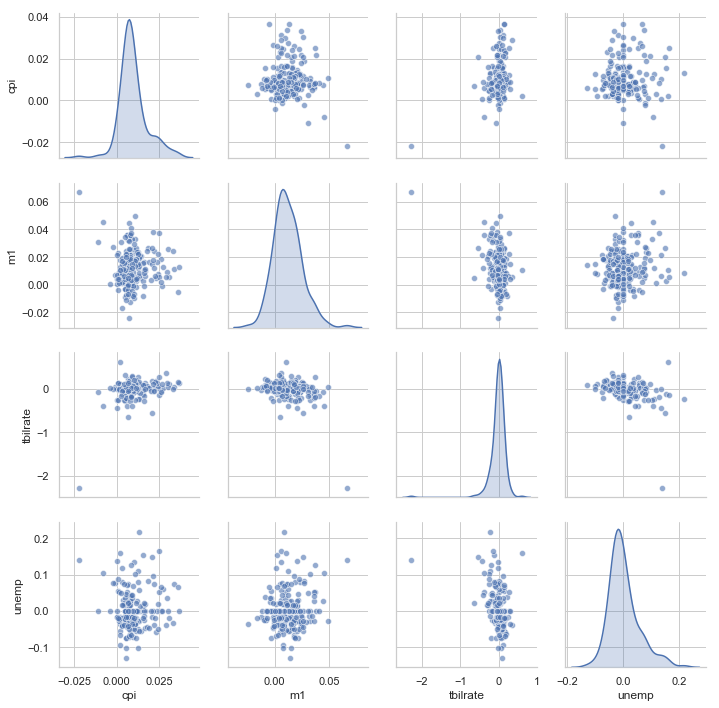

In [80]:
sns.pairplot(trans_data,diag_kind='kde',plot_kws={'alpha':0.6})

* plot_kws参数。它可以让我们传递配置选项到非对角线元素上的图形使用。对于更详细的配置选项，可以查阅seaborn.pairplot文档字符串。

## 分面网格和类型数据
* 有多个分类变量的数据可视化的一种方法是使用小面网格。seaborn有一个有用的内置函数factorplot，可以简化制作多种分面图

d:\program filles\python\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


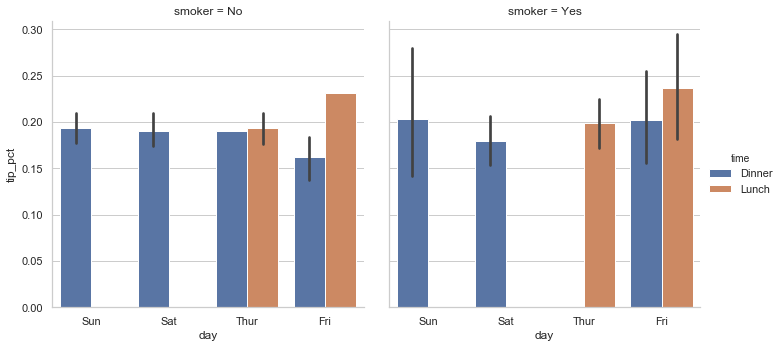

In [83]:
sns.factorplot(x='day',y='tip_pct',hue='time',col='smoker',kind='bar',data=tips[tips.tip_pct<1])

* 除了在分面中用不同的颜色按时间分组，我们还可以通过给每个时间值添加一行来扩展分面网格：

d:\program filles\python\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


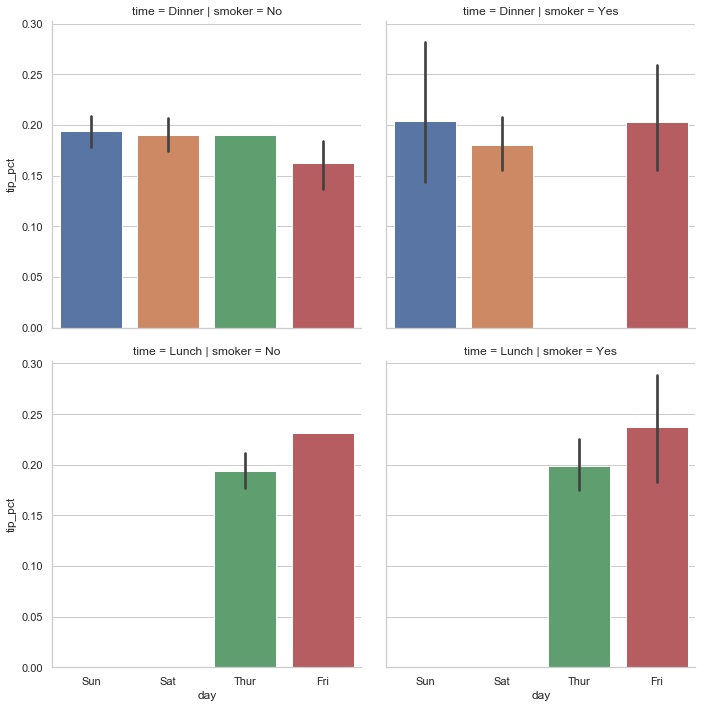

In [84]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

* factorplot支持其它的绘图类型，你可能会用到。例如，盒图（它可以显示中位数，四分位数，和异常值）就是一个有用的可视化类型

d:\program filles\python\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


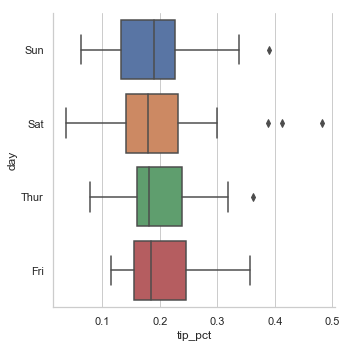

In [87]:
sns.factorplot(x='tip_pct',y='day',kind='box',data=tips[tips.tip_pct<0.5])